# Task 1

## Import Libraries

In [65]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np

## Find missing days in two dataframes

To find the missing dates in both datasets, we checked the number of entries for each day and looked for dates without any entries.

In [66]:
#looking for amount of entries each day Bochum
Nextbike_bochum_check = pd.read_csv("./dataset/bochum.csv")

df_b = Nextbike_bochum_check
df_b["day"] = pd.to_datetime(df_b.day)
    
s_b = df_b.groupby(['day']).size()
s_b_df = pd.DataFrame(s_b)

idx = pd.date_range(df_b['day'].min(), df_b['day'].max())
df = pd.DataFrame(index=idx)

df = pd.merge(df, s_b_df, left_index = True, right_index = True, how="left")
#df.merge(s_b_df, left_index = True, right_index = True, how"left")
missing_b =  df.isnull()
missing_b.columns = ["value"]
missing_b[missing_b["value"]==True]

,value
2019-03-16,True
2019-03-17,True
2019-03-18,True


In [67]:
#looking for amount of entries each day Leipzig
Nextbike_leipzig_check = pd.read_csv("./dataset/leipzig.csv")

df_l = Nextbike_leipzig_check
df_l["day"] = pd.to_datetime(df_l.day)
    
s_l = df_l.groupby(['day']).size()
s_l_df = pd.DataFrame(s_l)

idx = pd.date_range(df_l['day'].min(), df_l['day'].max())
df = pd.DataFrame(index=idx)

df = pd.merge(df, s_l_df, left_index = True, right_index = True, how="left")
#df.merge(s_b_df, left_index = True, right_index = True, how"left")
missing_l =  df.isnull()
missing_l.columns = ["value"]
missing_l[missing_l["value"]==True]

,value
2019-03-16,True
2019-03-17,True
2019-03-18,True


## Complete the datasets

After finding the missing dates in both datasets, we examined the weather data for these days (especially parameters such as temperature, precipitation, and wind force) and compared them with the weather data for the two weeks before and after the missing dates. For each day, we selected the day that was most similar to the parameter data. (noch mehr ins Detail gehen?). For Bochum: 16.03.2019 -> 09.03.2019, 17.03.2019 -> 10.03.2019, 18.03.2019 -> 25.03.2019 For Leipzig: (bisher die gleichen Tage, Überprüfung fehlt noch). The day data containing the most similar data is then copied to the missing days, so that both data boxes are expanded by three days each.


In [68]:
#import the datasets for complementary
Nextbike_bochum_raw = pd.read_csv("./dataset/bochum.csv")
Nextbike_leipzig_raw = pd.read_csv("./dataset/leipzig.csv")

In [69]:
#find the suitable days and copy their data for the missing days for Bochum
Nextbike_bochum1 = Nextbike_bochum_raw[(Nextbike_bochum_raw["day"]=="2019-03-09")]
Nextbike_bochum1_replace = Nextbike_bochum1.replace("2019-03-09", "2019-03-16")

Nextbike_bochum2 = Nextbike_bochum_raw[(Nextbike_bochum_raw["day"]=="2019-03-10")]
Nextbike_bochum2_replace = Nextbike_bochum2.replace("2019-03-10", "2019-03-17")

Nextbike_bochum3 = Nextbike_bochum_raw[(Nextbike_bochum_raw["day"]=="2019-03-25")]
Nextbike_bochum3_replace = Nextbike_bochum3.replace("2019-03-25", "2019-03-18")

In [70]:
Nextbike_bochum_merged = pd.concat([Nextbike_bochum1_replace, Nextbike_bochum2_replace, Nextbike_bochum3_replace], ignore_index=True)

Nextbike_bochum_raw = pd.concat([Nextbike_bochum_raw, Nextbike_bochum_merged],ignore_index=True)

In [71]:
#find the suitable days and copy their data for the missing days for Leipzig
Nextbike_leipzig1 = Nextbike_leipzig_raw[(Nextbike_leipzig_raw["day"]=="2019-03-09")]
Nextbike_leipzig1_replace = Nextbike_leipzig1.replace("2019-03-09", "2019-03-16")

Nextbike_leipzig2 = Nextbike_leipzig_raw[(Nextbike_leipzig_raw["day"]=="2019-03-10")]
Nextbike_leipzig2_replace = Nextbike_leipzig2.replace("2019-03-10", "2019-03-17")

Nextbike_leipzig3 = Nextbike_leipzig_raw[(Nextbike_leipzig_raw["day"]=="2019-03-25")]
Nextbike_leipzip3_replace = Nextbike_leipzig3.replace("2019-03-25", "2019-03-18")

In [72]:
Nextbike_leipzig_merged = pd.concat([Nextbike_leipzig1_replace, Nextbike_leipzig2_replace, Nextbike_leipzip3_replace], ignore_index=True)

Nextbike_leipzig_raw = pd.concat([Nextbike_leipzig_raw, Nextbike_leipzig_merged],ignore_index=True)

In [73]:
#merge the data sets from two cities into one
Nextbike_raw = Nextbike_bochum_raw.append(Nextbike_leipzig_raw)

Nextbike_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204578 entries, 0 to 187052
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   day            204578 non-null  object 
 1   time           204578 non-null  object 
 2   b_number       204578 non-null  int64  
 3   city           204578 non-null  object 
 4   trip_duration  204578 non-null  object 
 5   orig_lat       204578 non-null  float64
 6   orig_lng       204578 non-null  float64
 7   dest_lat       204578 non-null  float64
 8   dest_lng       204578 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 15.6+ MB


## Look for null values

In [76]:
Nextbike_raw.isnull().sum().sort_values(ascending=False)

dest_lng         0
dest_lat         0
orig_lng         0
orig_lat         0
trip_duration    0
city             0
b_number         0
time             0
day              0
dtype: int64

In [77]:
#Copy dataset for cleaning
Nextbike_clean = Nextbike_raw

## Correct Data Types

In [78]:
#Converting Trip Length to timedelta
Nextbike_clean['trip_duration'] = pd.to_timedelta(Nextbike_clean['trip_duration'])

#Converting start-time to datetime
Nextbike_clean['timestamp'] = pd.to_datetime(Nextbike_clean['day'] + ' ' +  Nextbike_clean['time'])
Nextbike_clean.drop(columns=['day','time'], inplace = True)

## Add columns for analysis

In [79]:
#Round datetime and extract possible categorisation attributes
Nextbike_clean['timestamp_rounded'] = Nextbike_clean['timestamp'].dt.floor('H')

Nextbike_clean['Weekday'] = Nextbike_clean['timestamp_rounded'].dt.weekday
Nextbike_clean['Week'] = Nextbike_clean['timestamp_rounded'].dt.isocalendar().week

Nextbike_clean['Time'] = Nextbike_clean['timestamp_rounded'].dt.time
Nextbike_clean["Time"] = Nextbike_clean["Time"].astype(str).str[:2].astype(int)

Nextbike_clean["date"] = Nextbike_clean.timestamp.dt.date
Nextbike_clean["date_str"] = Nextbike_clean.timestamp.dt.date.astype(str)

#take trip duration in minutes, calculate 1€ per 30 minutes of usage
Nextbike_clean["revenue"] = np.ceil((Nextbike_clean.trip_duration.dt.total_seconds()/60) /30)


#output
Nextbike_clean

,b_number,city,trip_duration,orig_lat,orig_lng,dest_lat,dest_lng,timestamp,timestamp_rounded,Weekday,Week,Time,date,date_str,revenue
0,683,bochum,0 days 00:10:00,51.489814,7.232856,51.479592,7.222239,2019-02-08 12:06:00,2019-02-08 12:00:00,4,6,12,2019-02-08,2019-02-08,1.0
1,683,bochum,0 days 00:14:00,51.479592,7.222239,51.472366,7.250500,2019-02-10 01:58:00,2019-02-10 01:00:00,6,6,1,2019-02-10,2019-02-10,1.0
2,683,bochum,0 days 00:28:00,51.472366,7.250500,51.479592,7.222239,2019-02-11 06:33:00,2019-02-11 06:00:00,0,7,6,2019-02-11,2019-02-11,1.0
3,683,bochum,0 days 00:58:00,51.479592,7.222239,51.483023,7.215314,2019-02-11 13:31:00,2019-02-11 13:00:00,0,7,13,2019-02-11,2019-02-11,2.0
4,683,bochum,0 days 00:22:00,51.483023,7.215314,51.479592,7.222239,2019-02-11 14:32:00,2019-02-11 14:00:00,0,7,14,2019-02-11,2019-02-11,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187048,39065,leipzig,0 days 00:05:00,51.312587,12.373529,51.320844,12.373260,2019-03-18 15:05:00,2019-03-18 15:00:00,0,12,15,2019-03-18,2019-03-18,1.0
187049,39065,leipzig,0 days 00:32:00,51.321249,12.373132,51.322769,12.373343,2019-03-18 16:12:00,2019-03-18 16:00:00,0,12,16,2019-03-18,2019-03-18,2.0
187050,39065,leipzig,0 days 00:03:00,51.322489,12.373612,51.321547,12.378849,2019-03-18 18:40:00,2019-03-18 18:00:00,0,12,18,2019-03-18,2019-03-18,1.0
187051,39065,leipzig,0 days 00:08:00,51.321760,12.378893,51.328649,12.378546,2019-03-18 18:48:00,2019-03-18 18:00:00,0,12,18,2019-03-18,2019-03-18,1.0




# Task 2

## Import Visualisation Libaries

In [80]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#Using scikit-learn library for fitting a polynomial regression
from sklearn.preprocessing import PolynomialFeatures

## Split data for analysis

In [81]:
Nextbike_clean_l = Nextbike_clean[Nextbike_clean.city == "leipzig"]
Nextbike_clean_b = Nextbike_clean[Nextbike_clean.city == "bochum"]

#define the data set of bochum as dataframe
df = Nextbike_clean_l[:]

## Find out size of the fleet
The idea is that a bike is recognized as part of the fleet if it has been rented in the last 7 days. So the size of the fleet is the amount of unique Bike IDs that have records for the last 7 days. We calculate this on a daily level to be precise yet not too intense to compute.

In [82]:
start_date = df.date.min()
end_date = df.date.max()
delta = pd.to_timedelta("1d")

dates = []
while start_date <= end_date:
    dates.append(start_date.strftime("%Y-%m-%d"))
    start_date += delta


fleet_size = pd.DataFrame([], index = dates, columns = ["search_array","fleet_size"]) 

search_array = []
for index, row in fleet_size.iterrows():
    search_array.append(index)
    if len(search_array) > 7:
        search_array.pop(0)
    row['search_array'] = search_array[:]
    row['fleet_size'] = df[df.date.astype(str).isin(search_array[:])].b_number.nunique()

#drop the column "search_arrary"
fleet_size.drop(columns=["search_array"], inplace = True)

## Analysis for revenue and fleet size

In [83]:
#sort the dataframe "df_by_date" by date
df_by_date = df.groupby("date_str").agg(
    revenue=('revenue', "sum"),
    trips=("b_number","count"),
    date=("date","min"),
    used_bikes=('b_number', pd.Series.nunique))

#correct the type of index into string and use it as a new column
fleet_size.index.astype(str, copy= False)
df_by_date["date_str"] = df_by_date["date"].astype(str)

#correct the type of column "date" into float and name it as "date_float"
df_by_date["date_float"] = (df_by_date["date"] - df_by_date["date"].min())  / np.timedelta64(1,'D')

#join the dataframe "df_by_date" in the dataframe "fleet_size"
df_by_date_merged = fleet_size.join(df_by_date)

#add new columns for three kips "usage", "revenue_pro_bike" and "revenue pro trip"
df_by_date_merged["usage"] = df_by_date_merged["used_bikes"] / df_by_date_merged["fleet_size"]
df_by_date_merged["revenue_pro_bike"] = df_by_date_merged["revenue"] / df_by_date_merged["fleet_size"]
df_by_date_merged["revenue_pro_trip"] = df_by_date_merged["revenue"] / df_by_date_merged["trips"]

df_by_date_merged

,fleet_size,revenue,trips,date,used_bikes,date_str,date_float,usage,revenue_pro_bike,revenue_pro_trip
2019-02-01,256,785.0,659,2019-02-01,256,2019-02-01,0.0,1,3.06641,1.191199
2019-02-02,329,664.0,526,2019-02-02,241,2019-02-02,1.0,0.732523,2.01824,1.262357
2019-02-03,350,352.0,285,2019-02-03,162,2019-02-03,2.0,0.462857,1.00571,1.235088
2019-02-04,390,623.0,499,2019-02-04,237,2019-02-04,3.0,0.607692,1.59744,1.248497
2019-02-05,421,654.0,573,2019-02-05,251,2019-02-05,4.0,0.5962,1.55344,1.141361
...,...,...,...,...,...,...,...,...,...,...
2019-06-26,785,3039.0,2552,2019-06-26,585,2019-06-26,145.0,0.745223,3.87134,1.190831
2019-06-27,787,2993.0,2555,2019-06-27,600,2019-06-27,146.0,0.762389,3.80305,1.171429
2019-06-28,789,3417.0,2857,2019-06-28,627,2019-06-28,147.0,0.794677,4.3308,1.196010
2019-06-29,795,3737.0,2780,2019-06-29,625,2019-06-29,148.0,0.786164,4.70063,1.344245


In [84]:
#sort the dataframe "df_by_hour" by hour
df_by_hour = df.groupby("timestamp_rounded").agg(
    revenue=('revenue', "sum"),
    trips=("b_number","count"),
    date=("date","min"),
    weekday=("Weekday","min"),
    week = ("Week","min"),
    time = ("Time","min"),
    used_bikes=('b_number', pd.Series.nunique))

#correct the type of index into string and use it as a new column
fleet_size.index.astype(str, copy= False)
df_by_hour["date_str"] = df_by_hour["date"].astype(str)

#merge the dataframe "df_by_hour" in the dataframe "fleet_size"
df_by_hour_merged = pd.merge(df_by_hour, fleet_size, right_index=True, left_on='date_str')

#add new columns for three kips "usage", "revenue_pro_bike" and "revenue pro trip"
df_by_hour_merged["usage"] = df_by_hour_merged["used_bikes"] / df_by_hour_merged["fleet_size"]
df_by_hour_merged["revenue_pro_bike"] = df_by_hour_merged["revenue"] / df_by_hour_merged["fleet_size"]
df_by_hour_merged["revenue_pro_trip"] = df_by_hour_merged["revenue"] / df_by_hour_merged["trips"]


df_by_hour_merged

,revenue,trips,date,weekday,week,time,used_bikes,date_str,fleet_size,usage,revenue_pro_bike,revenue_pro_trip
timestamp_rounded,,,,,,,,,,,,
2019-02-01 00:00:00,9.0,8,2019-02-01,4,5,0,8,2019-02-01,256,0.03125,0.0351562,1.125000
2019-02-01 01:00:00,9.0,7,2019-02-01,4,5,1,7,2019-02-01,256,0.0273438,0.0351562,1.285714
2019-02-01 02:00:00,7.0,2,2019-02-01,4,5,2,2,2019-02-01,256,0.0078125,0.0273438,3.500000
2019-02-01 03:00:00,3.0,3,2019-02-01,4,5,3,3,2019-02-01,256,0.0117188,0.0117188,1.000000
2019-02-01 04:00:00,9.0,8,2019-02-01,4,5,4,8,2019-02-01,256,0.03125,0.0351562,1.125000
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-30 19:00:00,116.0,91,2019-06-30,6,26,19,86,2019-06-30,790,0.108861,0.146835,1.274725
2019-06-30 20:00:00,104.0,87,2019-06-30,6,26,20,82,2019-06-30,790,0.103797,0.131646,1.195402
2019-06-30 21:00:00,82.0,66,2019-06-30,6,26,21,62,2019-06-30,790,0.078481,0.103797,1.242424


## Visiualization

### Polynomial regression and Plotting of kpis

In [85]:
#define the regression

def plot_Poly_regression(X,Y,d, xlabel, ylabel):
    
    poly_reg = PolynomialFeatures (degree = d)
    
    # Polynomial transformation
    x_poly = poly_reg.fit_transform(X.reshape(-1,1))
    lin_reg_Poly = LinearRegression()
    
    # Fitting linear regression to polynomial features
    lin_reg_Poly.fit(x_poly, Y)
    model_pred = lin_reg_Poly.predict(x_poly)
    
    # Plotting the regression line and the data
    x_fit = np.arange(X.min(),X.max() ,1)[:, np.newaxis]
    y_pred = lin_reg_Poly.predict(poly_reg.fit_transform(x_fit.reshape(-1,1)))
    
    plt.scatter(X,Y,marker="x", color = 'steelblue')
    ylim = plt.ylim()
    
    plt.plot(x_fit,y_pred, c='C1')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xlim([X.min()-2,X.max()+2])
    plt.ylim(ylim)
    
    print ('The R^2 for quadratic curve is: ',r2_score(Y, model_pred))

#### 1.1 Polynomial regression for daily usage

The R^2 for quadratic curve is:  0.5180581006200727


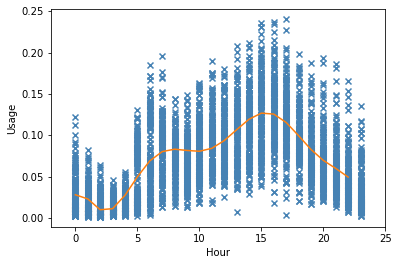

In [86]:
#define the attributes of x-axis as time and y-axis as the bike usage
xh = df_by_hour_merged["time"].values
yh = df_by_hour_merged["usage"].values

#call the regression function
plot_Poly_regression(X = xh, Y = yh,d = 10,xlabel="Hour",ylabel="Usage")

#### 1.2 polynomial regression for weekly usage

The R^2 for quadratic curve is:  0.04082133880360639


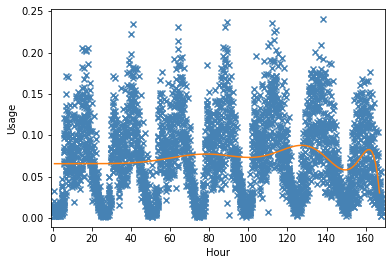

In [87]:
#define the attributes of x-axis as week time in hours and y-axis as the bike usage
xwu = df_by_hour_merged["weekday"].values * 24 + df_by_hour_merged["time"].values + 1
ywu = df_by_hour_merged["usage"].values

#call the regression function
plot_Poly_regression(X = xwu, Y = ywu,d = 13,xlabel="Hour",ylabel="Usage")

#### 1.3 Polynomial regression for monthly usage

The R^2 for quadratic curve is:  0.3957885224468881


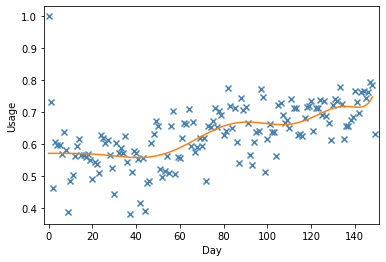

In [88]:
#drop the NAN value
df_by_date_merged = df_by_date_merged.dropna()

#define the attributes of x-axis as month in days and y-axis as the bike usage
xmu = df_by_date_merged["date_float"].values 
ymu = df_by_date_merged["usage"].values

#call the regression function
plot_Poly_regression(X = xmu, Y = ymu,d = 10, xlabel="Day", ylabel ="Usage")

#### 1.4 Plotting of monthly usage

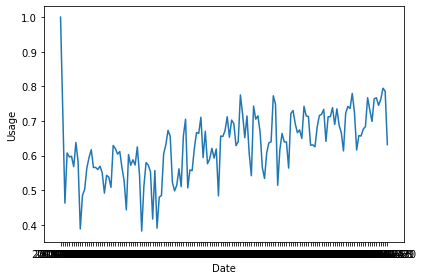

In [101]:
#call the plot function
#plt.plot(df_by_date_merged.index,df_by_date_merged.usage)

#Visualisation of monthly usage
dates = df_by_date_merged.index
usage = df_by_date_merged["usage"]

Fig_1, ax_1 = plt.subplots()

ax_1.set_xlabel('Date')
ax_1.set_ylabel("Usage")
ax_1.plot(dates, usage, color=color)
ax_1.tick_params(axis='y')

Fig_1.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

#### 2.1 Polynomial regression for daily revenue pro bike

The R^2 for quadratic curve is:  0.5076418087955101


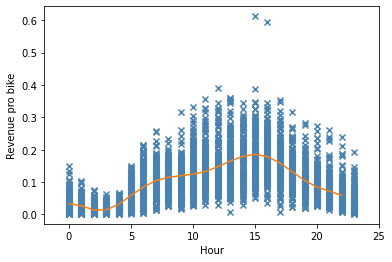

In [90]:
#define the attributes of x-axis as time and y-axis as the revenue pro bike
xdb = df_by_hour_merged["time"].values
ydb = df_by_hour_merged["revenue_pro_bike"].values

#call the regression function
plot_Poly_regression(X = xdb, Y = ydb,d = 10, xlabel="Hour", ylabel="Revenue pro bike")

#### 2.2 Polynomial regression for weekly revenue pro bike

The R^2 for quadratic curve is:  0.04951385491103932


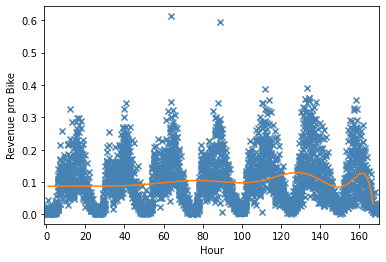

In [91]:
#define the attributes of x-axis as week time in hours and y-axis as the revenue pro bike
xwb = df_by_hour_merged["weekday"].values * 24 + df_by_hour_merged["time"].values + 1
ywb = df_by_hour_merged["revenue_pro_bike"].values

#call the regression function
plot_Poly_regression(X = xwb, Y = ywb,d = 13, xlabel = "Hour", ylabel = "Revenue pro Bike")

#### 2.3 Polynomial regression for monthly revenue pro bike

The R^2 for quadratic curve is:  0.6206281879134883


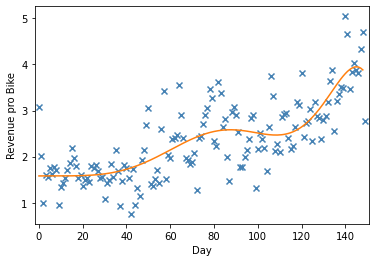

In [92]:
#define the attributes of x-axis as month in days and y-axis as the revenue pro bike
xmb = df_by_date_merged["date_float"].values 
ymb = df_by_date_merged["revenue_pro_bike"].values

#call the function regression
plot_Poly_regression(X = xmb, Y = ymb,d = 10, xlabel="Day", ylabel ="Revenue pro Bike")

#### 2.4 Plot of monthly revenue pro bike

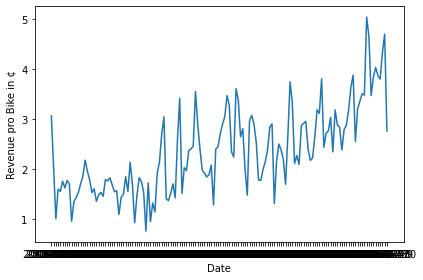

In [99]:
#call the plot function
#plt.plot(df_by_date_merged.index,df_by_date_merged.revenue_pro_bike)

#Visualisation of monthly revenue pro bike
dates = df_by_date_merged.index
revenueb = df_by_date_merged["revenue_pro_bike"]

Fig_1, ax_1 = plt.subplots()

color = 'tab:blue'
ax_1.set_xlabel('Date')
ax_1.set_ylabel('Revenue pro Bike in ¢')
ax_1.plot(dates, revenueb, color=color)
ax_1.tick_params(axis='y')

Fig_1.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

#### 3.1 Polynomial regression for daily revenue pro trip

The R^2 for quadratic curve is:  0.13822597116230106


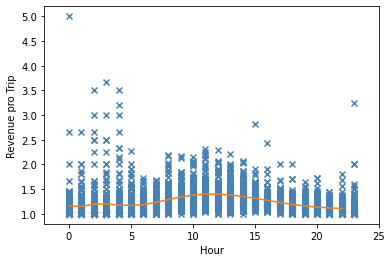

In [94]:
#define the attributes of x-axis as time and y-axis as the revenue pro trip
xdt = df_by_hour_merged["time"].values
ydt = df_by_hour_merged["revenue_pro_trip"].values

#call the regression function
plot_Poly_regression(X = xdt, Y = ydt,d = 10, xlabel = "Hour", ylabel = "Revenue pro Trip")

#### 3.2 Polynomial regression for weekly revenue pro trip

The R^2 for quadratic curve is:  0.04412896912829434


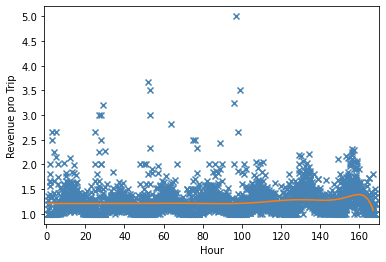

In [95]:
#define the attributes of x-axis as week time in hours and y-axis as the revenue pro trip
xwt = df_by_hour_merged["weekday"].values * 24 + df_by_hour_merged["time"].values + 1
ywt = df_by_hour_merged["revenue_pro_trip"].values

#call the regression function
plot_Poly_regression(X = xwt, Y = ywt,d = 13, xlabel = "Hour", ylabel = "Revenue pro Trip")

#### 3.3 Polynomial regression for monthly revenue pro trip

The R^2 for quadratic curve is:  0.08979140002261476


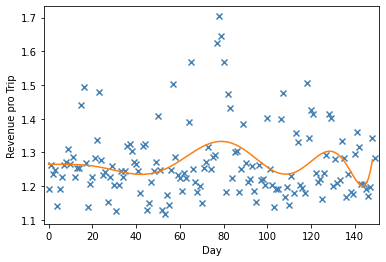

In [96]:
#define the attributes of x-axis as month in days and y-axis as the revenue pro trip
xmt = df_by_date_merged["date_float"].values 
ymt = df_by_date_merged["revenue_pro_trip"].values

#call the regression function
plot_Poly_regression(X = xmt, Y = ymt,d = 10, xlabel="Day", ylabel ="Revenue pro Trip")

#### 3.4 Plot of monthly revenue pro trip

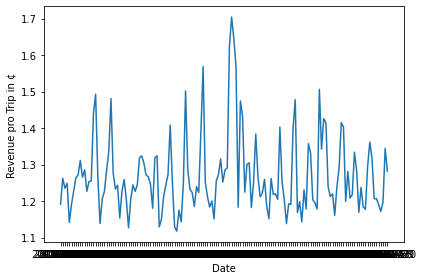

In [100]:
#call the plot function
#plt.plot(df_by_date_merged.index,df_by_date_merged.revenue_pro_trip)

#Visualisation of daily revenue pro trip
dates = df_by_date_merged.index
revenuet = df_by_date_merged["revenue_pro_trip"]

Fig_1, ax_1 = plt.subplots()

color = 'tab:blue'
ax_1.set_xlabel('Date')
ax_1.set_ylabel('Revenue pro Trip in ¢')
ax_1.plot(dates, revenuet, color=color)
ax_1.tick_params(axis='y')

Fig_1.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()